## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [36]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. Make a list of categorical and numerical columns in the data.

In [4]:
#numeric columns
df =tips.copy()
num_df = df.select_dtypes(include=['int64','float'])
num_df.shape

(244, 3)

In [11]:
num_df.columns.tolist()

['total_bill', 'tip', 'size']

In [9]:
#categorical columns
cat_df = df.select_dtypes(include=['category'])
cat_df.shape

(244, 4)

In [12]:
cat_df.columns.tolist()

['sex', 'smoker', 'day', 'time']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 2. Compute the average bill amount for each day.

In [17]:
# avg bill perday
tips_avgDay = df.groupby('day')['total_bill'].mean().apply(lambda x:round(x,2))
tips_avgDay

day
Thur    17.68
Fri     17.15
Sat     20.44
Sun     21.41
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [29]:
# generous gender 
gener_df = df.groupby('sex').sum()['tip']
print(gener_df)
#MALE is more generous

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64


<AxesSubplot:xlabel='sex', ylabel='tip'>

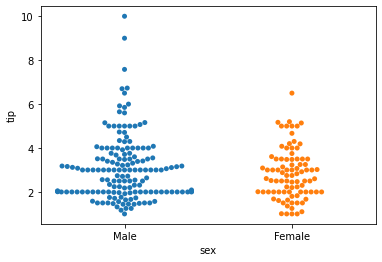

In [30]:
sns.swarmplot(x='sex',y='tip',data=df)

### 4. According to the data, were there more customers for dinner or lunch?

In [31]:
df.groupby('time')['size'].sum()
# During Dinner more customers

time
Lunch     164
Dinner    463
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [32]:
df['tip'].describe()
# Comment: On an average tip ranges between 1 and 10, and average is 2.99

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [33]:
df['day'].value_counts()
# Saturday

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [34]:
df['total_bill'].skew()

1.1332130376158205

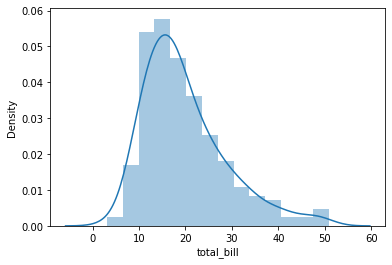

In [37]:
sns.distplot(df['total_bill'])
plt.show()
# skewed towards right

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [38]:
df[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

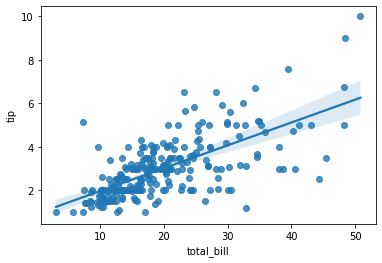

In [39]:
sns.regplot(x=df['total_bill'],y=df['tip'])
# hence tips is dependent on total bill with correlation factor of 0.675

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [42]:
df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

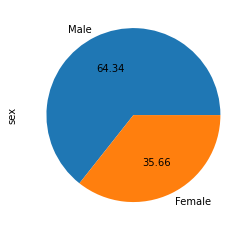

In [41]:
# plotting a pie chart percentage of male and female
df['sex'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [43]:
df.groupby('sex')['smoker'].value_counts()

sex        
Male    No     97
        Yes    60
Female  No     54
        Yes    33
Name: smoker, dtype: int64

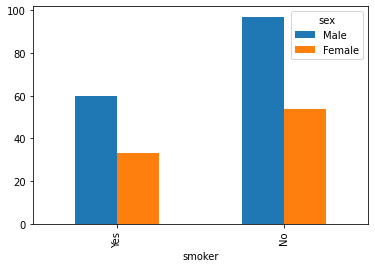

In [44]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


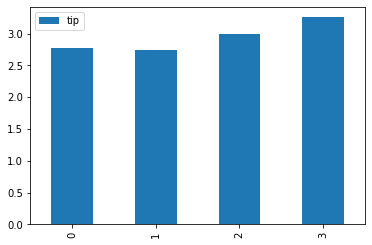

In [45]:
tips_day = df.groupby('day')['tip'].mean().reset_index()
tips_day.plot(kind='bar')
tips_day

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

,size,total_bill
0,1,7.242500
1,2,16.448013
2,3,23.277632
3,4,28.613514
4,5,30.068000
5,6,34.830000


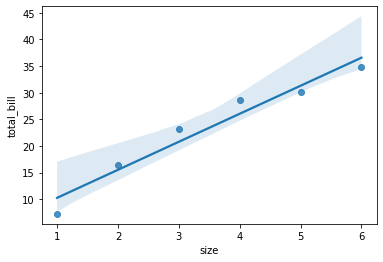

In [50]:
tips_avgDay1 = df.groupby('size')['total_bill'].mean().reset_index()
sns.regplot(x=tips_avgDay1['size'],y=tips_avgDay1['total_bill'])
tips_avgDay1

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

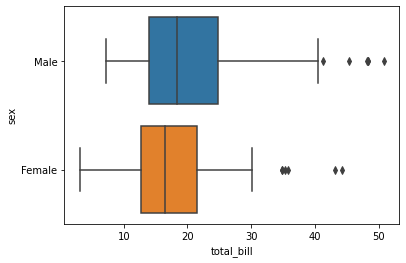

In [51]:
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()
#median bill for male is higher

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [77]:
df.loc[(df['day'] == 'Sat') | (df['day'] == 'Sun')].groupby(['time','day'])['total_bill'].max()

time    day 
Lunch   Thur      NaN
        Fri       NaN
        Sat       NaN
        Sun       NaN
Dinner  Thur      NaN
        Fri       NaN
        Sat     50.81
        Sun     48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [78]:
df.isnull().sum()/len(df) * 100

# no missing value

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [79]:
len(df[df.duplicated()])

1

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

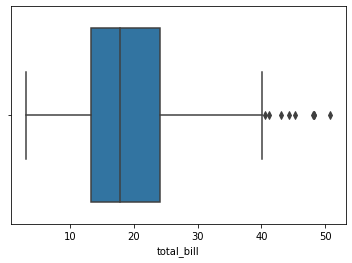

In [80]:
# before transformations plot
sns.boxplot(df['total_bill'])
plt.show()
# yes there are outliers

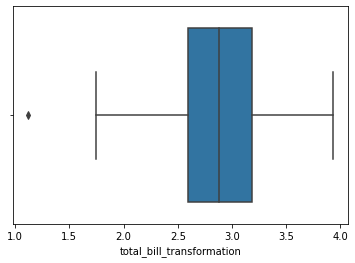

In [85]:
#after log transformation
df['total_bill_transformation'] = np.log(df['total_bill'])
sns.boxplot(df['total_bill_transformation'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

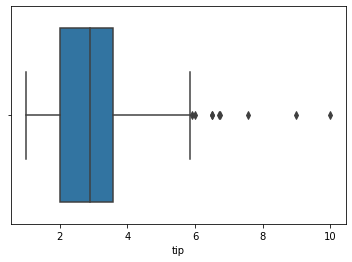

In [86]:
# before traansformation
sns.boxplot(df['tip'])
plt.show()

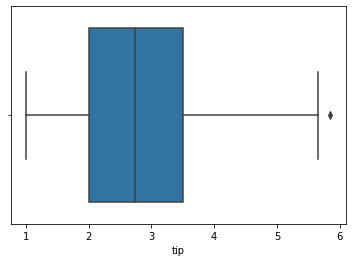

In [88]:
# outlier removal using IQR technique
Q1 =df['tip'].quantile(0.25)
Q3 =df['tip'].quantile(0.75)

IQR = Q3-Q1
lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)
df_out = df.loc[(df['tip']<upper_whisker) & (df['tip']>lower_whisker)]
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [89]:
cat_encoded_df = pd.get_dummies(df,drop_first=True)
cat_encoded_df.sample(5)

,total_bill,tip,size,total_bill_transformation,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
101,15.38,3.00,2,2.733068,1,0,1,0,0,1
152,17.26,2.74,3,2.848392,0,1,0,0,1,1
113,23.95,2.55,2,3.175968,0,1,0,0,1,1
201,12.74,2.01,2,2.544747,1,0,0,0,0,0
80,19.44,3.00,2,2.967333,0,0,0,0,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [90]:
#initial raange
max_val = df['total_bill'].max()
print('max',max_val)
min_val = df['total_bill'].max()
print('min',min_val)
range_bill = max_val-min_val
print('range',range_bill)

max 50.81
min 50.81
range 0.0


In [94]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df['scaled_bill'] = min_max.fit_transform(df[['total_bill']])
scaled_max = df['scaled_bill'].max()
scaled_min = df['scaled_bill'].min()
scaled_range = scaled_max-scaled_min
print('Scaled Range',scaled_range)

Scaled Range 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [95]:
tips_df = pd.get_dummies(df,drop_first=True)
X = tips_df.loc[:, tips_df.columns != 'tip']
Y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [96]:
from sklearn.model_selection import train_test_split
#split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)
#standardize
min_max = MinMaxScaler()
X_train['total_bill'] = min_max.fit_transform(X_train[['total_bill']])
X_train['size'] = min_max.fit_transform(X_train[['size']])
X_test['total_bill'] = min_max.fit_transform(X_test[['total_bill']])
X_test['size'] = min_max.fit_transform(X_test[['size']])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [98]:
from sklearn import linear_model

lin_tip_model = linear_model.LinearRegression()
lin_tip_model.fit(X_train, Y_train)
Y_Pred = lin_tip_model.predict(X_test)

r_sqr = lin_tip_model.score(X_test, Y_test)
print('r-squared', r_sqr)

r-squared 0.4351412616033562


### Happy Learning:)